## Simple Linear Regression. Minimal example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000
# np.random.uniform(low,high,size) draws a random value from the interval (low,high), 
    # where each number has an equal chance to be selected

# size=(number of observation, the number of variable)
xs = np.random.uniform(low=-10,high=10,size=(observations, 1)) 
zs = np.random.uniform(-10,10,size=(observations,1))

# From linear model: inputs = n x k = 1000 x 2
# np.column_stack(appropriate tuples): takes a sequence of 1D arrays and stacks them into a single 2D array
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

### Target = f(x,z) = 2*x - 3*z + 5 + noise

In [3]:
noise = np.random.uniform(-1,1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce

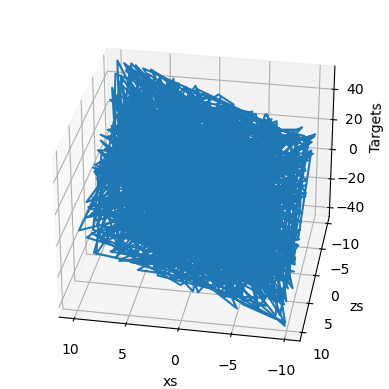

In [4]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)

plt.show()
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

## Initialize variables

In [10]:
# Our initial weights and bias will be picked randomly from the interval [-0.1,0.1]
init_range = 0.1

# w = 2 x 1 because of 2 variables
weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(init_range,init_range,size=(1))

print(weights)
print(biases)

[[-0.09169603]
 [-0.01339258]]
[0.1]


## Set a learning rate

In [11]:
learning_rate = 0.02

## Train the model

In [12]:
# calculate outputs -> compare outputs to targets through the loss
    # -> print the loss -> Adjust weights and biases
for i in range(100):
    # y = xw + b
    outputs = np.dot(inputs,weights) + biases # 1000x2 * 2x1 = 1000*1
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations # divided loss by observations is mean(loss)
    #loss = np.sum(abs(deltas)) / 2 / observations
    print("i: " + str(i) + " " + str(loss))
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

i: 0 234.22484601416835
i: 1 37.322637044937785
i: 2 14.33636872172244
i: 3 11.30095143809463
i: 4 10.575311227590152
i: 5 10.130902876975004
i: 6 9.733258839423833
i: 7 9.354712615123566
i: 8 8.991518186441601
i: 9 8.64272163092109
i: 10 8.307713608763756
i: 11 7.9859445418455834
i: 12 7.676890724793899
i: 13 7.380049631777185
i: 14 7.094938651579253
i: 15 6.8210942506857535
i: 16 6.558071213563232
i: 17 6.305441918114534
i: 18 6.0627956403684164
i: 19 5.829737886715924
i: 20 5.605889752542677
i: 21 5.390887306206748
i: 22 5.184380997359609
i: 23 4.986035088648234
i: 24 4.795527109874261
i: 25 4.612547333722909
i: 26 4.436798272209202
i: 27 4.2679941930228775
i: 28 4.105860654985633
i: 29 3.950134061865456
i: 30 3.8005612338226467
i: 31 3.656898995790771
i: 32 3.518913782123351
i: 33 3.3863812568635185
i: 34 3.2590859490192723
i: 35 3.1368209022513773
i: 36 3.019387338404336
i: 37 2.906594334333459
i: 38 2.7982585115025698
i: 39 2.6942037378477215
i: 40 2.594260841422195
i: 41 2.49826

## Print weights and biases and see if we have worked correctly

In [8]:
print(weights,biases)

[[ 1.99729315]
 [-3.00465113]] [4.39656113]


## Plot last output vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.

The closer this plot is to 45 degree line, the closer target and output values are.

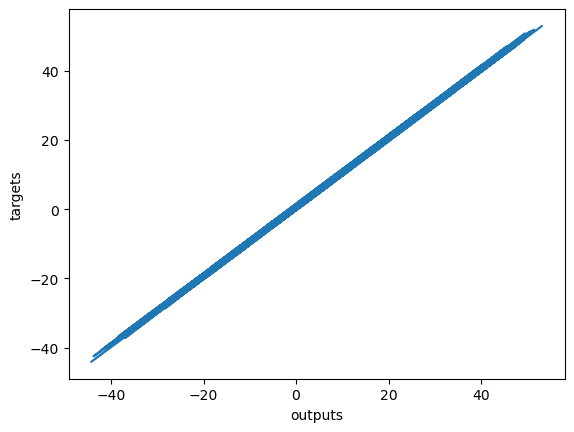

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()